In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.spatial.distance import cdist

class RadialBasisFunctionNetwork:
    def __init__(self, num_centers, learning_rate=0.1):
        self.num_centers = num_centers
        self.learning_rate = learning_rate
        self.centers = None
        self.weights = None

    def _initialize_centers(self, X):
        indices = np.random.choice(len(X), size=self.num_centers, replace=False)
        return X[indices]

    def _rbf_kernel(self, X, centers, sigma=1.0):
        distances = cdist(X, centers)
        return np.exp(-distances / (2 * sigma ** 2))

    def fit(self, X, y, epochs=100):
        self.centers = self._initialize_centers(X)
        phi = self._rbf_kernel(X, self.centers)

        phi = np.c_[np.ones(len(X)), phi]

        self.weights = np.linalg.pinv(phi) @ y

        for epoch in range(epochs):
            predictions = self.predict(X)
            error = y - predictions
            self.weights += self.learning_rate * phi.T @ error

    def predict(self, X):
        phi = self._rbf_kernel(X, self.centers)
        # Add bias term
        phi = np.c_[np.ones(len(X)), phi]
        return phi @ self.weights

In [3]:

# Create a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RBF network
num_centers = 10
learning_rate = 0.1

rbf_network = RadialBasisFunctionNetwork(num_centers=num_centers, learning_rate=learning_rate)
rbf_network.fit(X_train, y_train, epochs=100)

# Make predictions on the test set with a threshold of 0.5
predictions = (rbf_network.predict(X_test) > 0.5).astype(int)

# Evaluate the performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

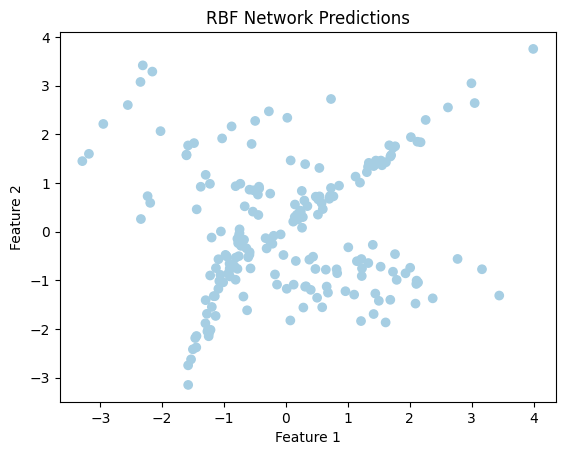

Accuracy: 0.505
Confusion Matrix:
[[101   0]
 [ 99   0]]


In [4]:
# Visualize the results
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=plt.cm.Paired)
plt.title('RBF Network Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
